In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

# Визначаємо архітектуру нейронної мережі
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Параметри моделі
input_size = 10  # Розмір вхідних даних
hidden_size = 20  # Кількість нейронів у прихованому шарі
output_size = 2   # Кількість виходів (наприклад, для класифікації на 2 класи)

# Ініціалізуємо модель
model = SimpleNN(input_size, hidden_size, output_size)

# Визначаємо функцію втрат та оптимізатор
criterion = nn.MSELoss()  # Використовуємо MSE для регресії (можна замінити на CrossEntropyLoss для класифікації)
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Генеруємо випадкові вхідні дані
x_train = torch.randn(5, input_size)  # 5 зразків, кожен з 10 входами
y_train = torch.randn(5, output_size)  # 5 очікуваних виходів

# Тренування моделі
epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()  # Очищення градієнтів
    outputs = model(x_train)  # Пряме поширення
    loss = criterion(outputs, y_train)  # Обчислення втрат
    loss.backward()  # Зворотне поширення
    optimizer.step()  # Оновлення ваг

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Перевірка на одному тестовому прикладі
test_sample = torch.randn(1, input_size)
print("Test prediction:", model(test_sample).detach().numpy())

Epoch [10/100], Loss: 0.4783
Epoch [20/100], Loss: 0.2574
Epoch [30/100], Loss: 0.1255
Epoch [40/100], Loss: 0.0209
Epoch [50/100], Loss: 0.0092
Epoch [60/100], Loss: 0.0016
Epoch [70/100], Loss: 0.0015
Epoch [80/100], Loss: 0.0003
Epoch [90/100], Loss: 0.0002
Epoch [100/100], Loss: 0.0001
Test prediction: [[ 0.8493167  -0.21377525]]


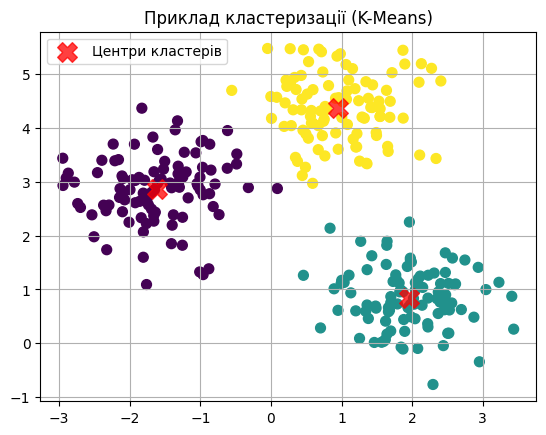

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Генеруємо штучні дані
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Застосовуємо KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Візуалізація кластерів
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Центри кластерів')
plt.title('Приклад кластеризації (K-Means)')
plt.legend()
plt.grid(True)
plt.show()


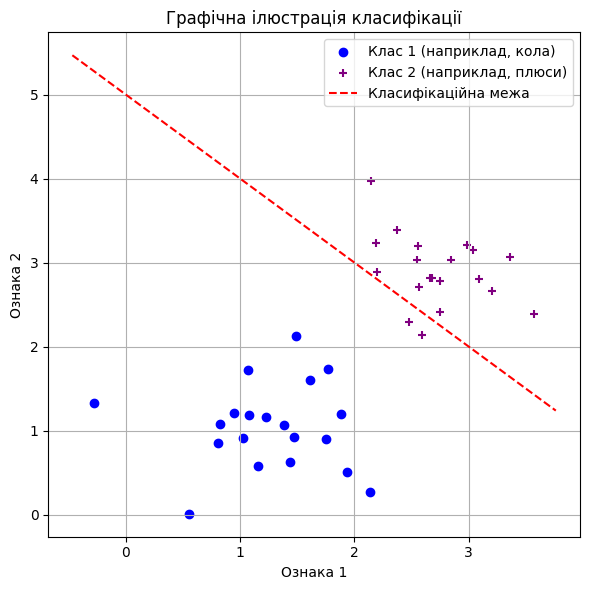

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Створимо вибірки для двох класів
np.random.seed(0)
class1 = np.random.randn(20, 2) * 0.5 + [1, 1]
class2 = np.random.randn(20, 2) * 0.5 + [3, 3]

# Побудуємо графік
plt.figure(figsize=(6, 6))
plt.scatter(class1[:, 0], class1[:, 1], color='blue', label='Клас 1 (наприклад, кола)')
plt.scatter(class2[:, 0], class2[:, 1], color='purple', marker='+', label='Клас 2 (наприклад, плюси)')

# Побудуємо розділяючу лінію (гіпотетичний класифікатор)
x_vals = np.array(plt.gca().get_xlim())
y_vals = -1 * x_vals + 5  # Проста діагональна межа
plt.plot(x_vals, y_vals, '--r', label='Класифікаційна межа')

plt.title("Графічна ілюстрація класифікації")
plt.xlabel("Ознака 1")
plt.ylabel("Ознака 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()